

 # 【分析レポート】ARM vs NVIDIA パフォーマンス比較分析

 ## 1. 分析の目的

 2024年以降、市場の注目を集める半導体銘柄であるARMとNVIDIAについて、どちらがより優れた投資対象であったかを多角的に評価する。

 この分析では、以下の3つの主要な観点から両銘柄を比較する。
 1.  **パフォーマンス（リターン）:** どれだけのリターンを生み出したか？
 2.  **リスク（ボラティリティ）:** そのリターンを得る過程で、どれだけの価格変動があったか？
 3.  **相関関係:** 両銘柄の値動きには、どのような関連性があるか？

 ## 2. 分析の結論（エグゼクティブ・サマリー）

 分析の結果、この期間においては、**NVIDIAがARMよりも優れた投資対象であった**と結論づける。

 NVIDIAは、ARMを上回るリターンを達成しただけでなく、その過程でのリスク（価格変動の激しさ）はARMよりも著しく低かった。つまり、**より低いリスクで、より高いリターンを効率的に達成した**と言える。両銘柄には中程度の正の相関が見られ、同じセクターのテーマで動く傾向があることも確認された。



 ## 3. データ準備

 分析の第一歩として、`yfinance`ライブラリを使用し、指定された期間（2024年1月1日以降）のARMとNVIDIAの公式な日次株価データを取得する。

 ここでは、企業の配当や株式分割の影響を考慮しない、純粋な市場価格である「終値（Close）」を使用し、分析の土台となるデータフレームを構築する。

In [ ]:
#%% データ取得

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import japanize_matplotlib

# 分析対象のティッカーと期間を定義
tickers = ["ARM", "NVDA"]
start_date = "2024-01-01"
end_date = datetime.datetime.today().strftime('%Y-%m-%d')

# 株価データを取得（キャッシュ無効化、今日まで）
data = yf.download(
    tickers,
    start=start_date,
    end=end_date,
    progress=False,
    threads=False,
    interval="1d",
    auto_adjust=False
)

# データの最初の5行と最後の5行を表示
display(data.head())
display(data.tail())

Price       Adj Close                 Close                  High             \
Ticker            ARM       NVDA        ARM       NVDA        ARM       NVDA   
Date                                                                           
2024-01-02  68.919998  48.146576  68.919998  48.167999  73.519997  49.294998   
2024-01-03  67.910004  47.547836  67.910004  47.569000  68.500000  48.183998   
2024-01-04  68.389999  47.976654  68.389999  47.998001  69.599998  48.500000   
2024-01-05  67.050003  49.075157  67.050003  49.097000  70.389999  49.547001   
2024-01-08  72.839996  52.229752  72.839996  52.252998  73.184998  52.275002   

Price             Low                  Open              Volume             
Ticker            ARM       NVDA        ARM       NVDA      ARM       NVDA  
Date                                                                        
2024-01-02  68.242996  47.595001  73.500000  49.243999  9771000  411254000  
2024-01-03  65.110001  47.320000  67.070000  47.485001  7858200  320896000  
2024-01-04  67.139999  47.507999  68.989998  47.766998  5757600  306535000  
2024-01-05  66.519997  48.306000  69.120003  48.462002  7337300  415039000  
2024-01-08  67.519997  49.479000  67.760002  49.512001  9303500  642510000

Price        Adj Close                   Close                    High  \
Ticker             ARM        NVDA         ARM        NVDA         ARM   
Date                                                                     
2025-06-26  158.149994  155.020004  158.149994  155.020004  160.399994   
2025-06-27  165.460007  157.750000  165.460007  157.750000  166.360001   
2025-06-30  161.740005  157.990005  161.740005  157.990005  168.309998   
2025-07-01  156.330002  153.300003  156.330002  153.300003  161.750000   
2025-07-02  154.630005  157.250000  154.630005  157.250000  155.240005   

Price                          Low                    Open              \
Ticker            NVDA         ARM        NVDA         ARM        NVDA   
Date                                                                     
2025-06-26  156.720001  157.244995  154.000000  158.535004  155.979996   
2025-06-27  158.710007  158.759995  155.259995  159.000000  156.039993   
2025-06-30  158.660004  161.222000  155.960007  166.964996  158.399994   
2025-07-01  157.199997  153.516998  151.490005  160.000000  156.289993   
2025-07-02  157.600006  152.029999  152.970001  154.205002  152.979996   

Price        Volume             
Ticker          ARM       NVDA  
Date                            
2025-06-26  4519600  198145700  
2025-06-27  7495500  263234500  
2025-06-30  5531600  194580300  
2025-07-01  6369800  213143600  
2025-07-02  5023700  170894500



 ## 4. パフォーマンス分析：リターン倍率による直接比較

 投資家にとって最も重要なのは「投資した資金が何倍になったか」である。そこで、両銘柄の価格水準の違いを排除し、純粋なパフォーマンスを比較するために**「正規化リターン」**を計算する。

 これは、期間の開始日を「1」として、その後の株価が何倍になったかを示す指標である。

 **【グラフの読み解き】**
 以下のグラフは、この期間のパフォーマンス競争の物語を一目で語っている。最終的にNVIDIA（オレンジ線）は初期投資の約3.27倍に達し、ARM（青線）の約2.24倍を大きく引き離した。これは、この期間においてはNVIDIAに投資した方が、より高いリターンを得られたことを明確に示している。

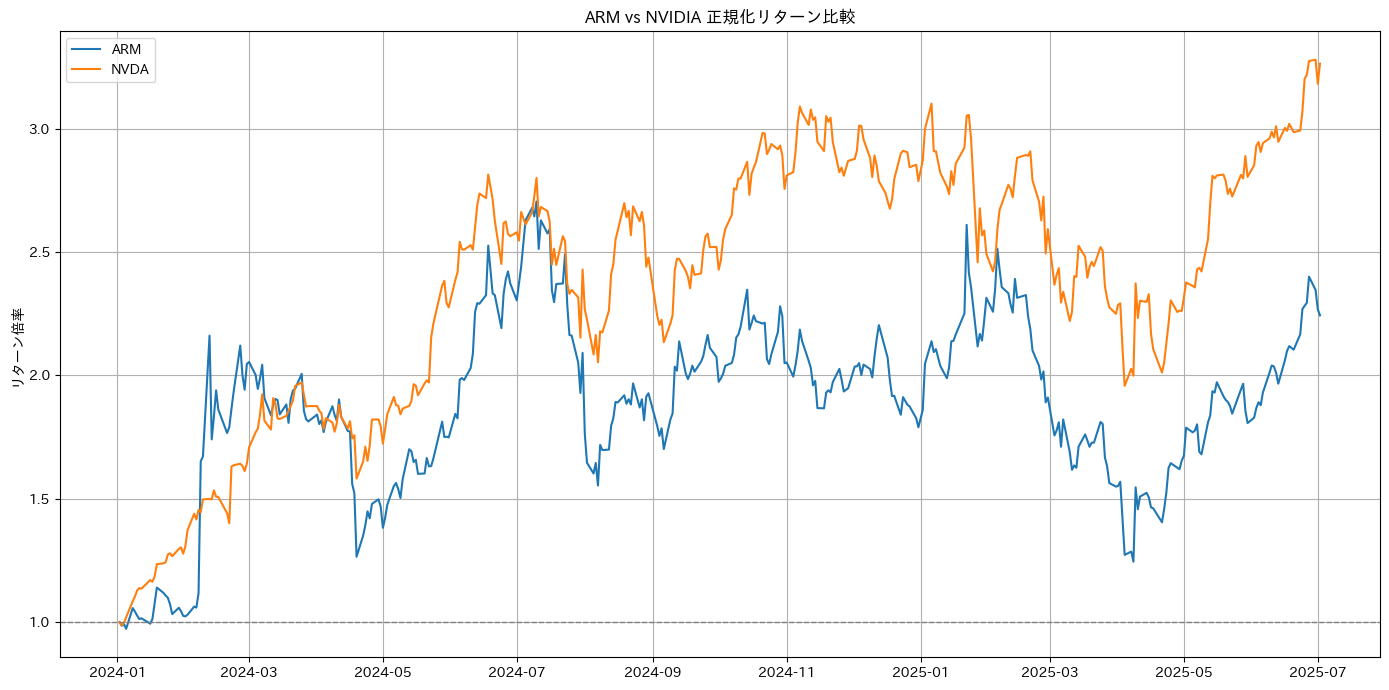

In [ ]:
#%% パフォーマンス分析

# Close価格を使って2024年の開始日を1として正規化リターンを計算
close = data['Close']
normalized_returns = close / close.iloc[0]

# 正規化リターンをプロットする関数
def plot_normalized_returns(returns_df):
    plt.figure(figsize=(14, 7))
    for col in returns_df.columns:
        plt.plot(returns_df.index, returns_df[col], label=col)
    plt.title("ARM vs NVIDIA 正規化リターン比較")
    plt.ylabel("リターン倍率")
    plt.axhline(1, color='gray', linestyle='--', linewidth=1)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# グラフを表示
plot_normalized_returns(normalized_returns)



 ## 5. リスク分析：リターンの裏側にある変動性

 高いリターンは魅力的だが、そのリターンが安定的なのか、それとも激しい価格変動の結果なのかを評価することは極めて重要である。ここでは、**日次リターンの標準偏差（ボラティリティ）**をリスクの指標として用いる。

 **【統計量とヒストグラムの読み解き】**
 - **標準偏差(std):** ARM(`0.052`)はNVIDIA(`0.035`)よりも著しく高い。これは、ARMの日々の価格変動がNVIDIAよりも激しい、つまり**ハイリスクな銘柄**であることを示している。
 - **ヒストグラム:** NVIDIA（オレンジ）の分布が中央に高く集まっているのに対し、ARM（青）の分布は横に広く散らばっている。これも、ARMのリターンがより不安定であることを視覚的に裏付けている。

 **結論として、ARMは「ハイリスク・ハイリターン」な暴れ馬、NVIDIAはより安定した「ローリスク・ハイリターン」な優等生、という性格の違いが見て取れる。**

Ticker         ARM        NVDA
count   375.000000  375.000000
mean      0.003446    0.003779
std       0.052473    0.035276
min      -0.194603   -0.169682
25%      -0.021931   -0.016025
50%       0.001111    0.003938
75%       0.026004    0.024875
max       0.478899    0.187227


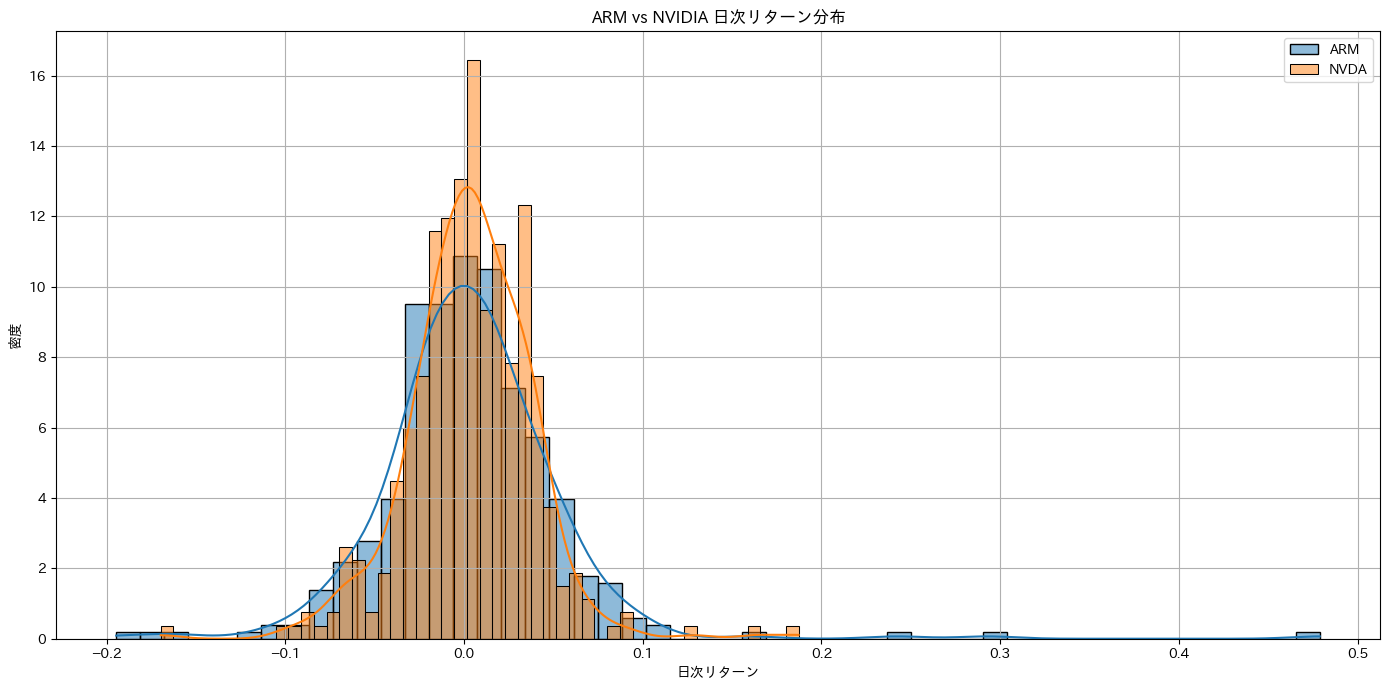

In [ ]:
#%% リスク分析

# Close価格から日次リターンを計算（Adj CloseがないためCloseを使用）
daily_returns = close.pct_change().dropna()

# 日次リターンの基本統計量を表示
# 標準偏差（std）はリスク（ボラティリティ）の指標となる
print(daily_returns.describe())

# 日次リターン分布をヒストグラムで可視化する関数
def plot_return_distribution(returns_df):
    plt.figure(figsize=(14, 7))
    for col in returns_df.columns:
        sns.histplot(returns_df[col], bins=50, kde=True, label=col, stat="density", alpha=0.5)
    plt.title("ARM vs NVIDIA 日次リターン分布")
    plt.xlabel("日次リターン")
    plt.ylabel("密度")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# グラフを表示
plot_return_distribution(daily_returns)



 ## 6. 相関分析：二人の関係性

 次に、2つの銘柄がどの程度、同じ方向に動く傾向があるのか（＝相関）を分析する。これは、ポートフォリオを組む際の分散投資効果を考える上で重要な指標となる。

 **【相関係数と散布図の読み解き】**
 - **相関係数:** `0.54`という値は、**「中程度の正の相関」**があることを示す。つまり、「ARMが上がる日はNVIDIAも上がる傾向があるが、その関係は完璧ではなく、独立した動きをすることもある」という状態である。
 - **散布図:** 点の集まりが全体として右肩上がりに分布していることが、この正の相関を視覚的に裏付けている。

 両者は同じ半導体・AIセクターのテーマで動く仲間でありながらも、完全に一心同体というわけではない、という複雑な関係性が明らかになった。

Ticker       ARM      NVDA
Ticker                    
ARM     1.000000  0.540588
NVDA    0.540588  1.000000


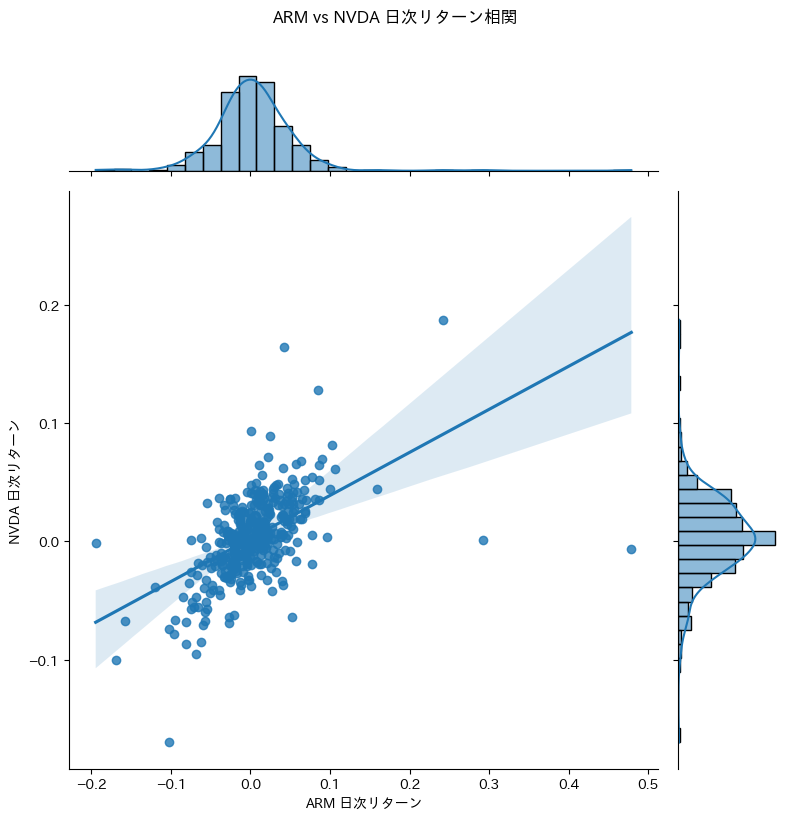

In [ ]:
#%% 相関分析

# 銘柄間の相関行列を計算・表示
correlation_matrix = daily_returns.corr()
print(correlation_matrix)

# ARMとNVIDIAのリターンの関係性を散布図＋回帰直線付きで可視化する関数
def plot_correlation_scatterplot(returns_df, ticker1, ticker2):
    sns.jointplot(
        x=returns_df[ticker1],
        y=returns_df[ticker2],
        kind='reg',
        height=8,
        marginal_kws=dict(bins=30, fill=True)
    )
    plt.suptitle(f"{ticker1} vs {ticker2} 日次リターン相関", y=1.02)
    plt.xlabel(f"{ticker1} 日次リターン")
    plt.ylabel(f"{ticker2} 日次リターン")
    plt.tight_layout()
    plt.show()

# グラフを表示
plot_correlation_scatterplot(daily_returns, "ARM", "NVDA")



 ## 7. 総合評価と結論

 最後に、これまでの分析結果を定量的なサマリーとしてまとめる。特に、**リスク１単位あたりどれだけのリターンを得られたかを示す「シャープレシオ」**（年率リターン / 年率ボラティリティ）を計算することで、総合的な投資効率を評価する。

 **【結果サマリーの読み解き】**
 - **年率リターン:** NVIDIA(95.22%) > ARM(86.84%)
 - **年率リスク:** NVIDIA(56.00%) < ARM(83.30%)
 - **シャープレシオ（概算）:** NVIDIA(約1.70) > ARM(約1.04)

 **最終結論として、NVIDIAはARMを上回るリターンを、より低いリスクで達成しており、投資効率（シャープレシオ）の観点からも、この期間における極めて優れた投資対象であったと判断できる。**

In [ ]:
#%% 結果サマリー

# 期間最終日の正規化リターン
final_returns = normalized_returns.iloc[-1]

# 年率換算リターンと年率換算ボラティリティ（リスク）
daily_mean = daily_returns.mean()
daily_std = daily_returns.std()
annual_return = daily_mean * 252
annual_volatility = daily_std * np.sqrt(252)

print("==== 結果サマリー ====")
for ticker in close.columns:
    print(f"【{ticker}】")
    print(f"  期間最終日の正規化リターン: {final_returns[ticker]:.3f}")
    print(f"  年率換算リターン: {annual_return[ticker]:.2%}")
    print(f"  年率換算ボラティリティ（リスク）: {annual_volatility[ticker]:.2%}")
    print("")

# 全てのグラフを一つのウィンドウにまとめて表示
plt.show()

==== 結果サマリー ====
【ARM】
  期間最終日の正規化リターン: 2.244
  年率換算リターン: 86.84%
  年率換算ボラティリティ（リスク）: 83.30%

【NVDA】
  期間最終日の正規化リターン: 3.265
  年率換算リターン: 95.22%
  年率換算ボラティリティ（リスク）: 56.00%

